Here I compare the real data, SN sims, and KN sims for various cuts.  Notably, I add flux-change-per-time cuts.

In [78]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms
reload(des_utils)

<module 'des_utils' from 'des_utils.py'>

In [79]:
SNpath = "../DESY1_KNtrigger_SNEFF1/*DAT"
KNpath = '../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF-0/*DAT'
datapath = "../DESY1_numepoch1_iz_real_text/*dat"
hostaccfile_s = '../hostMatching/Hostless_KN_DES_SVA1_C1.txt'
hostaccfile_d = '../hostMatching/Hostless_KN_DES_SVA1_X3.txt'
hostaccfiles = [hostaccfile_s,hostaccfile_d]
datatypes = ['KN','SN','data']
filetypes = ['sim','sim','data']
paths = [KNpath,SNpath, datapath]
fieldtypes = ['shallow','deep']
dict1 = dict()
for f,datatype in enumerate(datatypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[datatype+'_'+fieldtype] = trigColors.trigColors(paths[f],filetypes[f],fieldtype)
        dict1[datatype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[datatype+'_'+fieldtype]['cnites'],
                                                                                        dict1[datatype+'_'+fieldtype]['zbandinfo'],
                                                                                        dict1[datatype+'_'+fieldtype]['ibandinfo'],
                                                                                       3,10,1)
        if datatype == 'data':
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['DLR'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        elif datatype == 'KN':
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['DLR'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(infile=hostaccfiles[n], headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        else:
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        

**************shallow KN*****************
24 [24 68]
68 [24 68]
**************deep KN*****************
18 [18 54]
54 [18 54]
**************shallow SN*****************
**************deep SN*****************
**************shallow data*****************
[ {'DECL': '-0.011126', 'PRIVATE(DES_mjd_trigger)': '0.000', 'SNID': '1289898', 'PRIVATE(DES_hostgal_dlr)': '-9.00', 'HOSTGAL_OBJID': '-888', 'PRIVATE(DES_hostgal_gradient_g)': '-0.32', 'HOSTGAL_SPECZ': '-9.0000', 'PRIVATE(DES_cand_type)': '0', 'HOSTGAL_MAG': '888.00', 'PRIVATE(DES_numepochs_ml)': '1', 'MWEBV_ERR': '0', 'PRIVATE(DES_hostgal_gradient_z)': '0.66', 'PRIVATE(DES_ccdnum)': '33', 'PRIVATE(DES_numepochs)': '1', 'PRIVATE(DES_numepochs_trigger)': '1', 'MWEBV': '0', 'PRIVATE(DES_hostgal_gradient_i)': '1.16', 'HOSTGAL_SB_FLUXCAL': '0.05', 'REDSHIFT_HELIO': '-9.0000', 'RA': '42.147130', 'FILTERS': 'griz', 'PRIVATE(DES_nobs_offccd)': '0', 'HOSTGAL_PHOTOZ': '-9.0000', 'HOSTGAL_SNSEP': '-9.00', 'REDSHIFT_FINAL': '-9.0000', 'NXPIX': '2048'

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:76: RuntimeWarning: invalid value encountered in greater
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:77: RuntimeWarning: invalid value encountered in greater


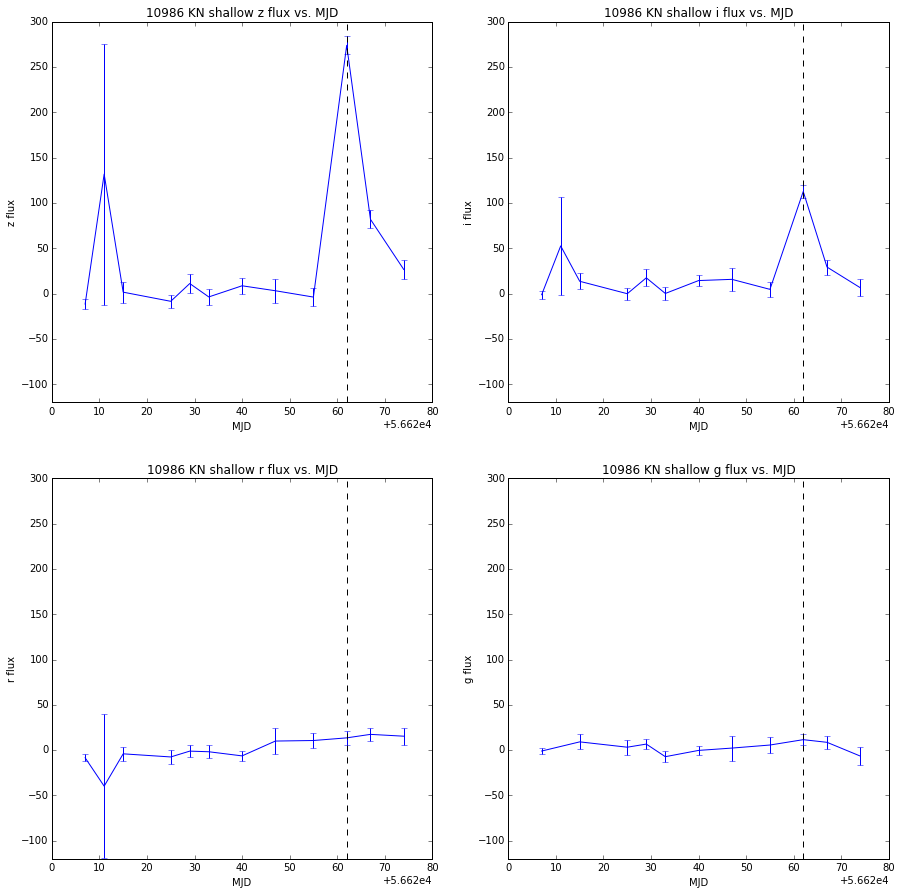

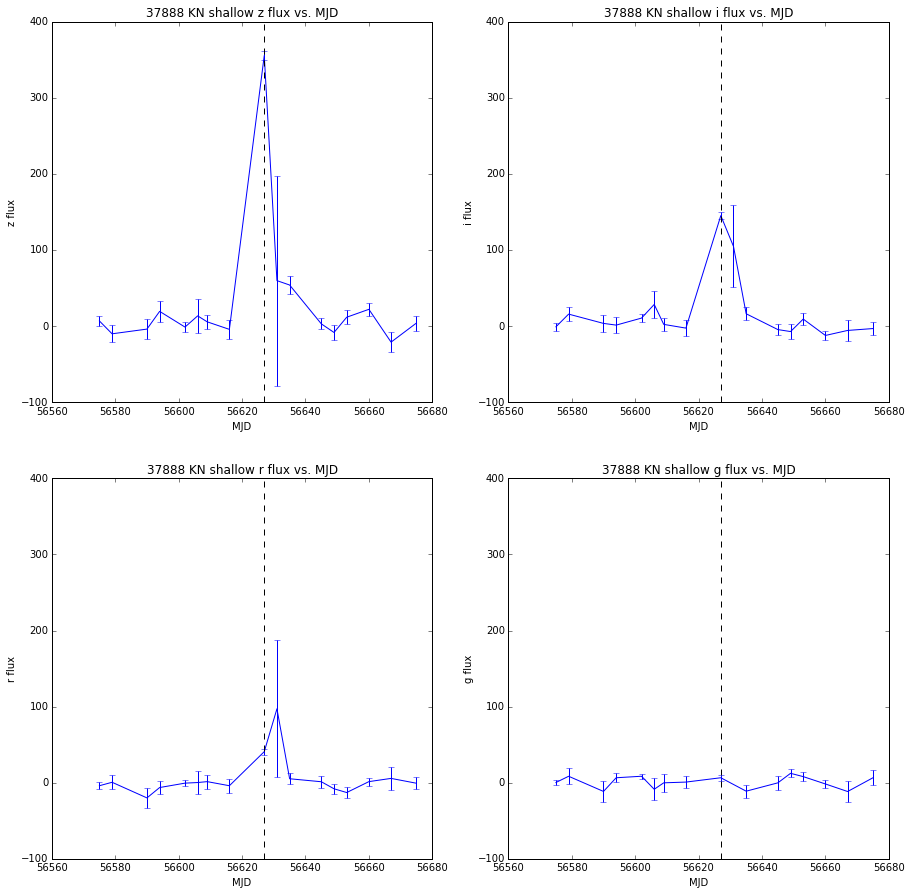

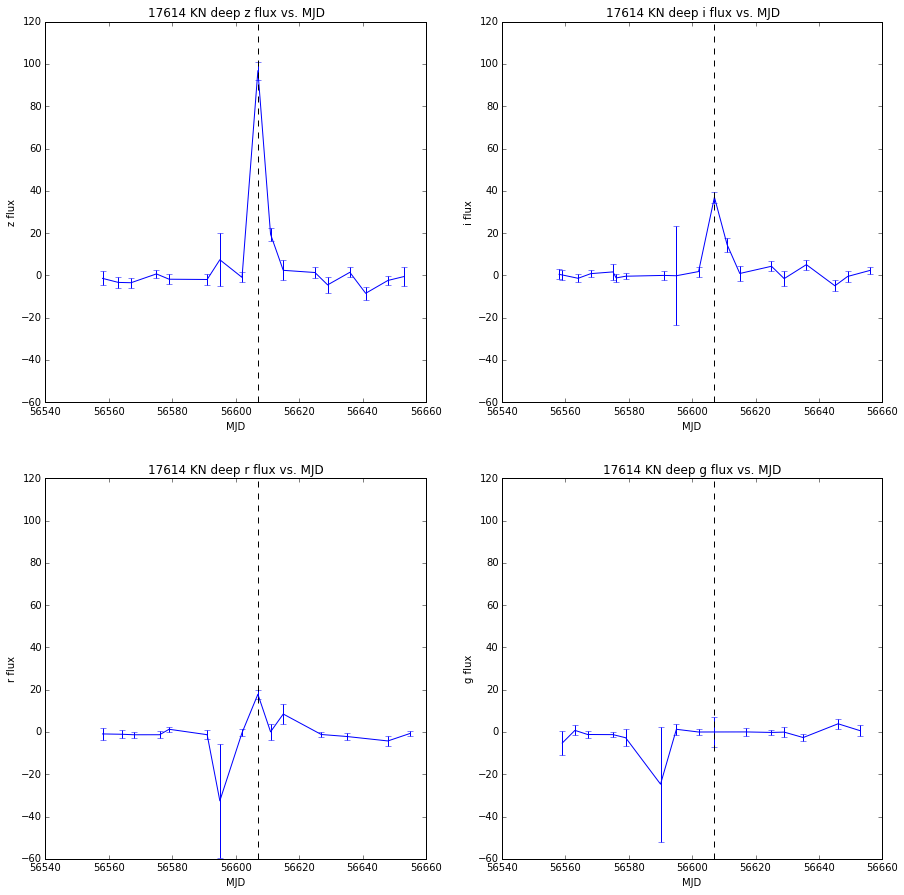

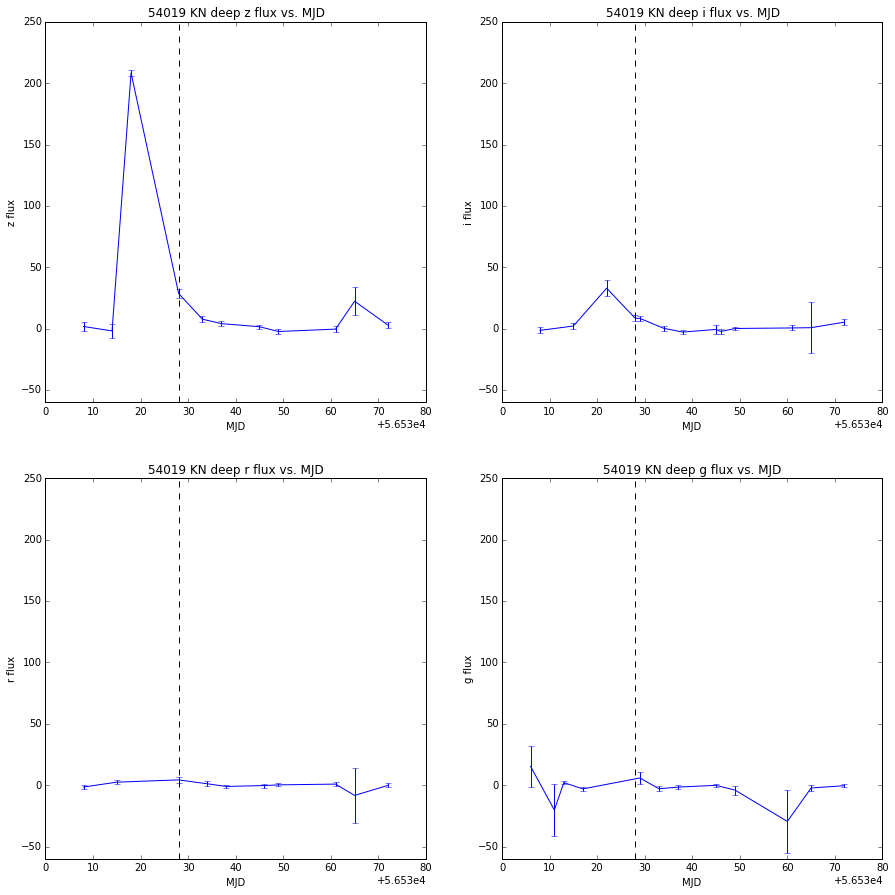

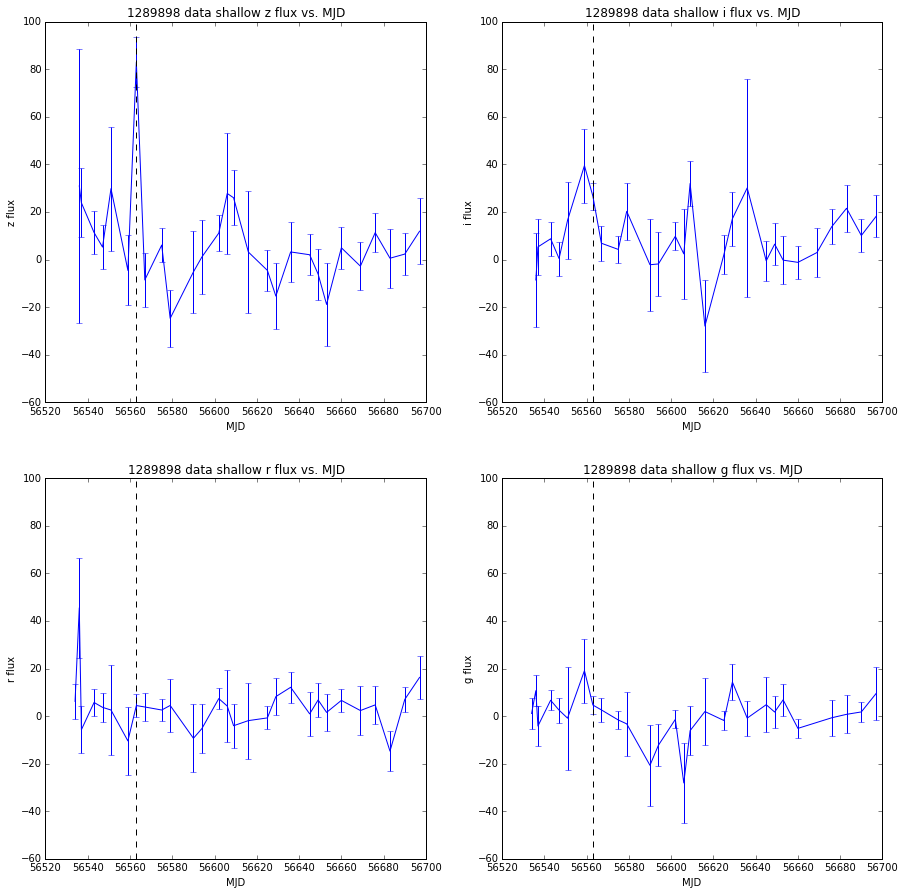

In [163]:
trigseplim = 7 #days
colorlim =0.85
seplim = 2
dlrlim = 2
zlim = 0.1
zslopelim1 = 0.1
zslopelim2 = 0.06
M_solar = [0.001,0.01,0.1]
beta = [0.1,0.2,0.3]
rownames = np.array(['trigs', '+followup','+timescale','+zveto','+1st frac d(flux)/dt','+2nd frac d(flux)/dt','+color'])
outputdata_s = np.empty([len(rownames),len(datatypes)],dtype=int)
outputdata_d = np.empty([len(rownames),len(datatypes)],dtype=int)
outputdata=[outputdata_s,outputdata_d]
legendlist = []
for f,filetype in enumerate(datatypes):
    for n,fieldtype in enumerate(fieldtypes):
        print '**************'+fieldtype + ' ' + filetype+'*****************'
        trigsel = dict1[filetype+'_'+fieldtype]['trigs']
        detsel = dict1[filetype+'_'+fieldtype]['detections']       
        trignites = dict1[filetype+'_'+fieldtype]['cnites']
        colors= dict1[filetype+'_'+fieldtype]['colors']
        z = dict1[filetype+'_'+fieldtype]['HOSTGAL_PHOTOZ']
        zbandinfo = dict1[filetype+'_'+fieldtype]['zbandinfo']
        ibandinfo = dict1[filetype+'_'+fieldtype]['ibandinfo']
        rbandinfo = dict1[filetype+'_'+fieldtype]['rbandinfo']
        gbandinfo = dict1[filetype+'_'+fieldtype]['gbandinfo']
        zsel = z < zlim
        if filetype == 'SN':
            hostgalsel = zsel
        else:
            dlr = dict1[filetype+'_'+fieldtype]['DLR']
            dlrsel = dlr > dlrlim
            sep = dict1[filetype+'_'+fieldtype]['SEP']
            sepsel = sep > seplim
            hostgalsel = zsel | sepsel | dlrsel 
        #print 'Nevent (cuts: trig, followup) objects: ', np.sum(trigsel & detsel) 
        #print 'Nevent (cuts: trig, followup, zveto) objects: ', np.sum(trigsel & detsel & hostgalsel) 
        nitediff = np.empty(len(trignites))
        for x,nites in enumerate(trignites):
            try:
                nitediff[x] = np.max(nites) - np.min(nites)
            except ValueError:
                nitediff[x] = 1000 
        nitediffsel = nitediff < trigseplim
        zslopes = np.empty(len(zbandinfo))
        zslopes2 = np.empty(len(zbandinfo))
        for r,zband in enumerate(zbandinfo):
            try:
                ztrigsel = np.in1d(trignites[r],zband[1])
                ztrignite = trignites[r][ztrigsel][0]
                ztrigflux = zband[2][zband[1]==ztrignite]
                zfollownite = zband[1][zband[1]>ztrignite][0]
                zfollowflux = zband[2][zband[1]>ztrignite][0]
                zfollownite2 = zband[1][zband[1]>ztrignite][1]
                zfollowflux2 = zband[2][zband[1]>ztrignite][1]
            except IndexError:
                ztrignite = np.NAN
                ztrigflux = np.NAN
                zfollownite = np.NAN
                zfollowflux = np.NAN
                zfollownite2 = np.NAN
                zfollowflux2 = np.NAN
            #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
            try:
                zslopes[r] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
            except ValueError:
                print zfollowflux,ztrigflux,zfollownite,ztrignite
            #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
            #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
            try:
                zslopes2[r] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
            except ValueError:
                print zfollowflux2,ztrigflux,zfollownite2,ztrignite
        #print 'Nevent (cuts: trig, followup, zveto, timescale) objects: ', np.sum(trigsel & detsel & hostgalsel&nitediffsel) 
        colorsel = colors > colorlim
        zslopesel = (zslopes > zslopelim1) | np.isnan(zslopes)
        zslopesel2 = (zslopes2 > zslopelim2) | np.isnan(zslopes2)
        #print 'Nevent (cuts: trig, followup, zveto, timescale, color) objects: ', np.sum(trigsel & detsel & hostgalsel&nitediffsel&colorsel)
        outputdata[n][rownames=='trigs',f] = np.sum(trigsel)
        outputdata[n][rownames=='+followup',f] = np.sum(trigsel & detsel)
        outputdata[n][rownames=='+timescale',f] = np.sum(trigsel & detsel & nitediffsel)
        outputdata[n][rownames=='+zveto',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel)
        outputdata[n][rownames=='+1st frac d(flux)/dt',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & zslopesel)
        outputdata[n][rownames=='+2nd frac d(flux)/dt',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2) 
        outputdata[n][rownames=='+color',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel)
        if filetype == 'data' and fieldtype == 'shallow':
            print np.array(dict1[filetype+'_'+fieldtype]['headers'])[trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel]
            print np.array(dict1[filetype+'_'+fieldtype]['cnites'])[trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel]
            allsel = trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel
            if np.sum(allsel) > 0:
                for num, zband in enumerate(zbandinfo[allsel]):
                    #plt.figure()
                    #plt.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                    #plt.errorbar(zband[1],zband[2],yerr=zband[4],color='r')
                    snid = np.array(dict1[filetype+'_'+fieldtype]['headers'])[allsel][num]['SNID']
                    #plt.title('flux for object number ' + snid)
                    #plt.xlabel('MJD')
                    #plt.ylabel('flux')
                    vertline = trignites[allsel][num][0]
                    #plt.axvline(vertline,linestyle = '--',color='black')
                    #plt.legend(['i-flux','z-flux'])
                    lcfig = plt.figure(figsize=(15,15))
                    axz = lcfig.add_subplot(221)
                    axi = lcfig.add_subplot(222)
                    axr = lcfig.add_subplot(223)
                    axg = lcfig.add_subplot(224)
                    axi.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                    axz.errorbar(zband[1],zband[2],yerr=zband[4],color='b')
                    axr.errorbar(rbandinfo[allsel][num][1],rbandinfo[allsel][num][2],yerr=rbandinfo[allsel][num][4],color='b')
                    axg.errorbar(gbandinfo[allsel][num][1],gbandinfo[allsel][num][2],yerr=gbandinfo[allsel][num][4],color='b')
                    axi.axvline(vertline,linestyle = '--',color='black')
                    axz.axvline(vertline,linestyle = '--',color='black')
                    axr.axvline(vertline,linestyle = '--',color='black')
                    axg.axvline(vertline,linestyle = '--',color='black')
                    xmini,xmaxi = axi.get_xlim()
                    ymini,ymaxi = axi.get_ylim()
                    xminz,xmaxz = axz.get_xlim()
                    yminz,ymaxz = axz.get_ylim()
                    xming,xmaxg = axg.get_xlim()
                    yming,ymaxg = axg.get_ylim()
                    xminr,xmaxr = axr.get_xlim()
                    yminr,ymaxr = axr.get_ylim()
                    xmins = [xmini,xminz,xming,xminr]
                    ymins = [ymini,yminz,yming,yminr]
                    xmaxs = [xmaxi,xmaxz,xmaxg,xmaxr]
                    ymaxs = [ymaxi,ymaxz,ymaxg,ymaxr]
                    xmin = min(xmins)
                    ymin = min(ymins)
                    xmax = max(xmaxs)
                    ymax = max(ymaxs)
                    axi.set_xlim([xmin,xmax])
                    axi.set_ylim([ymin,ymax])
                    axz.set_xlim([xmin,xmax])
                    axz.set_ylim([ymin,ymax])
                    axr.set_xlim([xmin,xmax])
                    axr.set_ylim([ymin,ymax])
                    axg.set_xlim([xmin,xmax])
                    axg.set_ylim([ymin,ymax])
                    axi.set_title(snid+ ' '+filetype+' '+fieldtype+' i flux vs. MJD')
                    axz.set_title(snid+ ' '+filetype+' '+fieldtype+' z flux vs. MJD')
                    axr.set_title(snid+ ' '+filetype+' '+fieldtype+' r flux vs. MJD')
                    axg.set_title(snid+ ' '+filetype+' '+fieldtype+' g flux vs. MJD')
                    axi.set_xlabel('MJD')
                    axz.set_xlabel('MJD')
                    axr.set_xlabel('MJD')
                    axg.set_xlabel('MJD')
                    axi.set_ylabel('i flux')
                    axz.set_ylabel('z flux')
                    axr.set_ylabel('r flux')
                    axg.set_ylabel('g flux')
        if filetype == 'KN':
            allsel = trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel
            if np.sum(allsel) > 0:
                randints = np.random.randint(0,np.sum(allsel),size=2)
                for num, zband in enumerate(zbandinfo[allsel]):
                    if num == randints[0] or num == randints[1]:
                        print num, randints
                        #plt.figure()
                        #plt.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                        #plt.errorbar(zband[1],zband[2],yerr=zband[4],color='r')
                        snid = np.array(dict1[filetype+'_'+fieldtype]['headers'])[allsel][num]['SNID']
                        #plt.title('flux for object number ' + snid)
                        #plt.xlabel('MJD')
                        #plt.ylabel('flux')
                        vertline = trignites[allsel][num][0]
                        #plt.axvline(vertline,linestyle = '--',color='black')
                        #plt.legend(['i-flux','z-flux'])
                        lcfig = plt.figure(figsize=(15,15))
                        axz = lcfig.add_subplot(221)
                        axi = lcfig.add_subplot(222)
                        axr = lcfig.add_subplot(223)
                        axg = lcfig.add_subplot(224)
                        axi.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                        axz.errorbar(zband[1],zband[2],yerr=zband[4],color='b')
                        axr.errorbar(rbandinfo[allsel][num][1],rbandinfo[allsel][num][2],yerr=rbandinfo[allsel][num][4],color='b')
                        axg.errorbar(gbandinfo[allsel][num][1],gbandinfo[allsel][num][2],yerr=gbandinfo[allsel][num][4],color='b')
                        axi.axvline(vertline,linestyle = '--',color='black')
                        axz.axvline(vertline,linestyle = '--',color='black')
                        axr.axvline(vertline,linestyle = '--',color='black')
                        axg.axvline(vertline,linestyle = '--',color='black')
                        xmini,xmaxi = axi.get_xlim()
                        ymini,ymaxi = axi.get_ylim()
                        xminz,xmaxz = axz.get_xlim()
                        yminz,ymaxz = axz.get_ylim()
                        xming,xmaxg = axg.get_xlim()
                        yming,ymaxg = axg.get_ylim()
                        xminr,xmaxr = axr.get_xlim()
                        yminr,ymaxr = axr.get_ylim()
                        xmins = [xmini,xminz,xming,xminr]
                        ymins = [ymini,yminz,yming,yminr]
                        xmaxs = [xmaxi,xmaxz,xmaxg,xmaxr]
                        ymaxs = [ymaxi,ymaxz,ymaxg,ymaxr]
                        xmin = min(xmins)
                        ymin = min(ymins)
                        xmax = max(xmaxs)
                        ymax = max(ymaxs)
                        axi.set_xlim([xmin,xmax])
                        axi.set_ylim([ymin,ymax])
                        axz.set_xlim([xmin,xmax])
                        axz.set_ylim([ymin,ymax])
                        axr.set_xlim([xmin,xmax])
                        axr.set_ylim([ymin,ymax])
                        axg.set_xlim([xmin,xmax])
                        axg.set_ylim([ymin,ymax])
                        axi.set_title(snid+ ' '+filetype+' '+fieldtype+' i flux vs. MJD')
                        axz.set_title(snid+ ' '+filetype+' '+fieldtype+' z flux vs. MJD')
                        axr.set_title(snid+ ' '+filetype+' '+fieldtype+' r flux vs. MJD')
                        axg.set_title(snid+ ' '+filetype+' '+fieldtype+' g flux vs. MJD')
                        axi.set_xlabel('MJD')
                        axz.set_xlabel('MJD')
                        axr.set_xlabel('MJD')
                        axg.set_xlabel('MJD')
                        axi.set_ylabel('i flux')
                        axz.set_ylabel('z flux')
                        axr.set_ylabel('r flux')
                        axg.set_ylabel('g flux')
        

In [164]:
colnames = ['Cuts','Ndata','N_SN_sim','N_KN_sim','Ndata/N_SN', 'N_KN/N_KN(trig)','KNefficiency','Snstv Rate']

In [165]:
dumpfile = '../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF-0/ZDNTEST_MAGOFF-0.DUMP'
dumpdata = np.genfromtxt(dumpfile,skip_header=1,names=True,dtype=None)
deepsel = (dumpdata['FIELD'] == 'X3') | (dumpdata['FIELD'] == 'C3')
shallowsel = ~deepsel
fieldsels = [shallowsel,deepsel]
NKN_tot = [np.sum(shallowsel),np.sum(deepsel)]

In [166]:
outputtable_s = np.empty([len(rownames)+1,len(colnames)],dtype=object)
outputtable_d = np.empty([len(rownames)+1,len(colnames)],dtype=object)
outputtable = [outputtable_s,outputtable_d]
fieldsizeratio = [1.,.25]
for n,fieldtype in enumerate(fieldtypes):
    outputtable[n][0,:] = colnames
    outputtable[n][1:,0] = rownames
    Ndata = [str(it) for i,it in enumerate(outputdata[n][:,2])]
    N_SN_sim = [str(it) for i,it in enumerate(outputdata[n][:,1])]
    N_KN_sim = [str(it) for i,it in enumerate(outputdata[n][:,0])]
    data_sn_ratio = [str(np.around(it,decimals=5)) for i,it in enumerate(np.divide(outputdata[n][:,2].astype(float),outputdata[n][:,1]))]
    KN_cut_trig_ratio = [str(np.around(it,decimals=5)) for i,it in enumerate(outputdata[n][:,0].astype(float)/outputdata[n][0,0])]
    KNeff = [str(np.around(it,decimals=5)) for i,it in enumerate(outputdata[n][:,0].astype(float)/NKN_tot[n])]
    snstvRate = [str(np.divide(1.,np.around(it,decimals=5)*.52*.9e5*fieldsizeratio[n])) for i,it in enumerate(outputdata[n][:,0].astype(float)/NKN_tot[n])]
    outputtable[n][1:,1] = Ndata
    outputtable[n][1:,2] = N_SN_sim
    outputtable[n][1:,3] = N_KN_sim
    outputtable[n][1:,4] = data_sn_ratio
    outputtable[n][1:,5] = KN_cut_trig_ratio
    outputtable[n][1:,6] = KNeff
    outputtable[n][1:,7] = snstvRate

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide


In [167]:
print '**** shallow fields ****'
for l in range(0,len(outputtable[0][:,0])):
    print outputtable[0][l,0].rjust(10), 
    print outputtable[0][l,1].rjust(7), 
    print outputtable[0][l,2].rjust(7),
    print outputtable[0][l,3].rjust(7), 
    print outputtable[0][l,4].rjust(10), 
    print outputtable[0][l,5].rjust(15), 
    print outputtable[0][l,6].rjust(10),
    print outputtable[0][l,7].rjust(10)
print '**** deep fields ****'
for l in range(0,len(outputtable[0][:,0])):
    print outputtable[1][l,0].rjust(10), 
    print outputtable[1][l,1].rjust(7), 
    print outputtable[1][l,2].rjust(7),
    print outputtable[1][l,3].rjust(7), 
    print outputtable[1][l,4].rjust(10), 
    print outputtable[1][l,5].rjust(15), 
    print outputtable[1][l,6].rjust(10),
    print outputtable[1][l,7].rjust(10)

**** shallow fields ****
      Cuts   Ndata N_SN_sim N_KN_sim Ndata/N_SN N_KN/N_KN(trig) KNefficiency Snstv Rate
     trigs    1720     765     762    2.24837             1.0    0.00945 0.00226111337222
 +followup    1626     722     672    2.25208         0.88189    0.00833 0.00256512861555
+timescale     748     267     605     2.8015         0.79396     0.0075 0.002849002849
    +zveto     382      86     530    4.44186         0.69554    0.00657 0.00325228635731
+1st frac d(flux)/dt     190      15     366   12.66667         0.48031    0.00454 0.00470650250386
+2nd frac d(flux)/dt     137       5     319       27.4         0.41864    0.00396 0.00539583872917
    +color       1       0     178        inf          0.2336    0.00221 0.00966856170476
**** deep fields ****
      Cuts   Ndata N_SN_sim N_KN_sim Ndata/N_SN N_KN/N_KN(trig) KNefficiency Snstv Rate
     trigs     544     523     340    1.04015             1.0    0.01756 0.00486731694021
 +followup     517     497     296    1

In [168]:
import csv
import datetime
import time
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

# write it
with open('outputfiles/Nevent_output'+st+'.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([st])
    writer.writerow(['KN path: ' + KNpath])
    writer.writerow(['SN path: ' + SNpath])
    writer.writerow(['data path: ' + datapath])
    writer.writerow(['follow up lims: 3-10 days'])
    writer.writerow(['timescale cut: '+str(trigseplim)+' days'])
    writer.writerow(['for hostgal association, sep < '+str(seplim)+' and DLR < '+str(dlrlim)])
    writer.writerow(['zveto cut: '+str(zlim)])
    writer.writerow(['color cut: '+str(colorlim)])
    writer.writerow(['********shallow fields********'])
    [writer.writerow(r) for r in outputtable[0]]
    writer.writerow(['********deep fields********'])
    [writer.writerow(r) for r in outputtable[1]]
np.savetxt('outputfiles/Nevent_output'+st,outputtable[0],fmt="%s")
#f = open('outputfiles/hi.txt','w+')
#for x,ex in enumerate(outputtable[0][:,0]):
#    f.write(outputtable[0][x,:])  
#f.close()